Cluster labels were generated using qgis software. this was done to make it easier to analyze gwls by grouping those closer together with dimilar characteristics

In [2]:
#Import Prerequisites
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv

In [3]:
#Load the File
df = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/gwls/summary sheet with clusters.xlsx')
df

,sheet name,latitude,longitude,start date,end date,missing values,total Years Running,missing percentage,range,cluster_label,Comment
0,D4N0037,-25.982000,25.922530,1973-08-01,2012-02-01,93,39,19.9,1,2,done
1,D4N0053,-25.909420,25.893060,1974-02-01,2005-01-01,80,31,21.5,1,5,done
2,D4N0115,-25.917970,25.894350,1975-05-01,2005-03-01,47,30,13.1,1,5,done
3,D4N0116,-26.007222,25.855000,1975-05-01,2005-01-01,60,30,16.7,1,2,done
4,D4N0066,-26.019167,25.920556,1975-03-01,2002-04-01,66,27,20.4,1,2,done
5,D4N0130,-25.917500,25.978056,1976-04-01,2002-12-01,66,26,21.2,1,4,done
6,2525DD00054,-25.935710,25.821770,1980-06-01,2005-01-01,44,25,14.7,1,0,done
7,D4N0065,-26.003056,25.900000,1975-06-01,2000-02-01,66,25,22.0,1,2,done
8,D4N0108,-25.908440,25.886250,1975-07-01,2019-06-01,152,44,28.8,2,5,done
9,D4N0117,-25.966000,25.842970,1975-05-01,2019-04-01,160,44,30.3,2,0,done


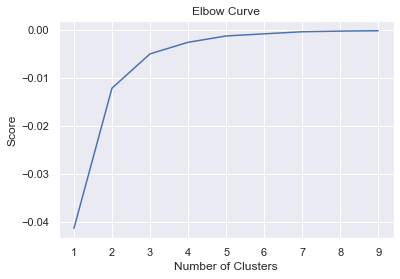

In [4]:
#checking optimal numbers of clusters using elbow methid
K_clusters = range(1,10)

kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = df[['latitude']]
X_axis = df[['longitude']]

score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in 
         range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#When we graph the plot, we see that the graph levels off slowly after 3 clusters. 
#This implies that addition of more clusters will not help us that much.

In [5]:
# Create a variable that only has what we need. We need the ‘sheet name’ so that we can join to the original data later, the longitude and the latitude.

X = df.loc[:,['sheet name','latitude','longitude']]
X.head(10)

,sheet name,latitude,longitude
0,D4N0037,-25.982000,25.922530
1,D4N0053,-25.909420,25.893060
2,D4N0115,-25.917970,25.894350
3,D4N0116,-26.007222,25.855000
4,D4N0066,-26.019167,25.920556
5,D4N0130,-25.917500,25.978056
6,2525DD00054,-25.935710,25.821770
7,D4N0065,-26.003056,25.900000
8,D4N0108,-25.908440,25.886250
9,D4N0117,-25.966000,25.842970


In [8]:
# n_clusters int, optional, default 8. The number of clusters to form as well as the number of centroids to generate.
kmeans = KMeans(n_clusters = 6, init ='k-means++')

# Compute k-means clustering.
kmeans.fit(X[X.columns[1:3]]) 

X['cluster_label_updated'] = kmeans.fit_predict(X[X.columns[1:3]])

# Coordinates of cluster centers.
centers = kmeans.cluster_centers_ 

# Labels of each point
labels = kmeans.predict(X[X.columns[1:3]]) 

X.head(10)

,sheet name,latitude,longitude,cluster_label_updated
0,D4N0037,-25.982000,25.922530,1
1,D4N0053,-25.909420,25.893060,2
2,D4N0115,-25.917970,25.894350,2
3,D4N0116,-26.007222,25.855000,1
4,D4N0066,-26.019167,25.920556,1
5,D4N0130,-25.917500,25.978056,4
6,2525DD00054,-25.935710,25.821770,5
7,D4N0065,-26.003056,25.900000,1
8,D4N0108,-25.908440,25.886250,2
9,D4N0117,-25.966000,25.842970,5


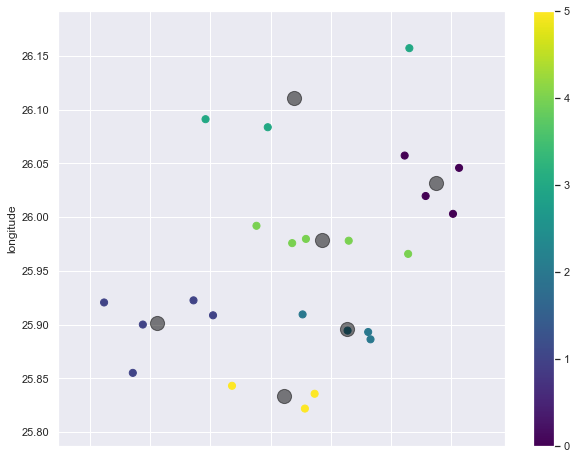

In [9]:
X.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.gcf().set_size_inches((10, 8)) 
plt.show()

In [9]:
X = X[['sheet name','cluster_label']]

In [10]:
clustered_data = df.merge(X, left_on='sheet name', right_on='sheet name')

In [11]:
clustered_data.to_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/gwls/final boreholes summary sheet with clusters.xlsx')

In [12]:
centers = kmeans.cluster_centers_
print(centers)

[[-25.93668397  25.83442587]
 [-25.88391733  26.03098911]
 [-26.0045      25.90005323]
 [-25.94237833  26.12169333]
 [-25.93775644  25.98091622]
 [-25.936462    25.893227  ]
 [-25.80055556  25.935     ]
 [-26.02695756  25.97499089]]


LINK USED:
    https://levelup.gitconnected.com/clustering-gps-co-ordinates-forming-regions-4f50caa7e4a1

defence of using k-means:
https://datascience.stackexchange.com/questions/761/clustering-geo-location-coordinates-lat-long-pairs
    
- the feasibility of k-means would depend on where your data are. If your data is spreaded all over the world, it wont work, as the distance is not euclidean,
- But if your data is more local, k-means would be good enough, as the geometry is locally euclidean.
- K-means should be right in this case. 
- Since k-means tries to group based solely on euclidean distance between objects you will get back clusters of locations that are close to each other. 